build dataframe using matrix_decomposition.ipnyb
load dataframe here

In [3]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1) Load CSV
csv_path = r"C:\Jupyter_Notebooks\csv files\big_Q_list.csv"
df = pd.read_csv(csv_path)

# 2) Parse tuple columns into separate DataFrame columns
# a) Forward error (3‐tuple)
fwd_df = df['fwd_err'].apply(ast.literal_eval).apply(pd.Series)
fwd_df.columns = ['fwd_pade', 'fwd_rk45', 'fwd_sp']
df = df.join(fwd_df)

# b) Decomp error p=12 (5‐tuple, last is chosen method)
dec12_df = df['decomp_err_12'].apply(ast.literal_eval).apply(pd.Series)
dec12_df.columns = ['dec12_pade', 'dec12_rk45', 'dec12_sp', 'dec12_10', 'dec12_chosen']
df = df.join(dec12_df)

# c) Decomp error p=365
dec365_df = df['decomp_err_365'].apply(ast.literal_eval).apply(pd.Series)
dec365_df.columns = ['dec365_pade', 'dec365_rk45', 'dec365_sp', 'dec365_10', 'dec365_chosen']
df = df.join(dec365_df)

define plotting functions

In [8]:
# Updated plotting functions with requested label changes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated plotting functions that save high-resolution PNGs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_size_vs_fwd_error(df):
    plt.figure(figsize=(8,6))
    for col, label in [('fwd_pade','Pade'), ('fwd_rk45','RK45'), ('fwd_sp','SP')]:
        plt.plot(df['size'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Matrix size (n)')
    plt.ylabel('Forward error')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('size_vs_fwd_error.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_size_vs_decomp_error_12(df):
    plt.figure(figsize=(8,6))
    for col, label in [
        ('dec12_pade','Pade'),
        ('dec12_rk45','RK45'),
        ('dec12_sp','SP'),
        ('dec12_10','direct methods')
    ]:
        plt.plot(df['size'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Matrix size (n)')
    plt.ylabel('Scaling error p=12')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('size_vs_scaling_error_p12.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_size_vs_decomp_error_365(df):
    plt.figure(figsize=(8,6))
    for col, label in [
        ('dec365_pade','Pade'),
        ('dec365_rk45','RK45'),
        ('dec365_sp','SP'),
        ('dec365_10','direct methods')
    ]:
        plt.plot(df['size'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Matrix size (n)')
    plt.ylabel('Scaling error p=365')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('size_vs_scaling_error_p365.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_sparsity_vs_fwd_error(df):
    plt.figure(figsize=(8,6))
    for col, label in [('fwd_pade','Pade'), ('fwd_rk45','RK45'), ('fwd_sp','SP')]:
        plt.plot(df['sparsity'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Sparsity (fraction zeros)')
    plt.ylabel('Forward error')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('sparsity_vs_fwd_error.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_sparsity_vs_decomp_error_12(df):
    plt.figure(figsize=(8,6))
    for col, label in [
        ('dec12_pade','Pade'),
        ('dec12_rk45','RK45'),
        ('dec12_sp','SP'),
        ('dec12_10','direct methods')
    ]:
        plt.plot(df['sparsity'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Sparsity (fraction zeros)')
    plt.ylabel('Scaling error p=12')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('sparsity_vs_scaling_error_p12.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_sparsity_vs_decomp_error_365(df):
    plt.figure(figsize=(8,6))
    for col, label in [
        ('dec365_pade','Pade'),
        ('dec365_rk45','RK45'),
        ('dec365_sp','SP'),
        ('dec365_10','direct methods')
    ]:
        plt.plot(df['sparsity'], df[col].astype(float), marker='o', linestyle="None", label=label)
    plt.xlabel('Sparsity (fraction zeros)')
    plt.ylabel('Scaling error p=365')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('sparsity_vs_scaling_error_p365.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_decomp12_heatmaps(df):
    methods = [
        ('dec12_pade', 'Pade'),
        ('dec12_rk45', 'RK45'),
        ('dec12_sp',   'SP'),
        ('dec12_10',   'direct methods')
    ]
    for col, _ in methods:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['sparsity_bin'] = np.floor(df['sparsity'] * 10) / 10
    bins = np.round(np.arange(0.0, 1.01, 0.1), 1)
    sizes = sorted(df['size'].dropna().unique())
    Zs = {}
    for col, _ in methods:
        pivot = df.pivot_table(index='sparsity_bin', columns='size', values=col, aggfunc='mean') \
                  .reindex(index=bins, columns=sizes)
        Zs[col] = np.log10(pivot.values.astype(float))
    all_vals = np.concatenate([Z.flatten() for Z in Zs.values()])
    vmin, vmax = np.nanmin(all_vals), np.nanmax(all_vals)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
    for ax, (col, label) in zip(axes.flat, methods):
        im = ax.imshow(Zs[col], origin='lower', aspect='auto', interpolation='none',
                       cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(label)
        ax.set_xlabel('Size')
        ax.set_ylabel('Sparsity (binned)')
        ax.set_xticks(range(len(sizes)))
        ax.set_xticklabels(sizes, rotation=45)
        ax.set_yticks(range(len(bins)))
        ax.set_yticklabels([f"{b:.1f}" for b in bins])
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical')
    cbar.set_label("log10(scaling error p=12)")
    plt.suptitle("Scaling Error p=12 Heatmaps: Size vs Sparsity (Shared Scale)", fontsize=16)
    plt.show()

def plot_error_boxplots_full(df):
    df2 = df.copy()
    error_cols = [
        'fwd_pade','fwd_rk45','fwd_sp',
        'dec12_pade','dec12_rk45','dec12_sp','dec12_10',
        'dec365_pade','dec365_rk45','dec365_sp','dec365_10'
    ]
    for col in error_cols:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2['size_bin'] = ((df2['size'] - 1)//5)*5 + 5
    df2['spars_bin'] = np.floor(df2['sparsity']*10)/10
    metrics = {
        'Forward Error': ['fwd_pade','fwd_rk45','fwd_sp'],
        'Scaling Error p=12': ['dec12_pade','dec12_rk45','dec12_sp','dec12_10'],
        'Scaling Error p=365': ['dec365_pade','dec365_rk45','dec365_sp','dec365_10']
    }
    method_labels = {
        'fwd_pade':'Pade','fwd_rk45':'RK45','fwd_sp':'SP',
        'dec12_pade':'Pade','dec12_rk45':'RK45','dec12_sp':'SP','dec12_10':'direct methods',
        'dec365_pade':'Pade','dec365_rk45':'RK45','dec365_sp':'SP','dec365_10':'direct methods'
    }
    size_bins = sorted(df2['size_bin'].dropna().unique())
    spars_bins = sorted(df2['spars_bin'].dropna().unique())
    for metric_name, cols in metrics.items():
        for col in cols:
            label = method_labels[col]
            for bin_col, bins, xlabel in [
                ('size_bin', size_bins, 'Matrix size bin'),
                ('spars_bin', spars_bins, 'Sparsity bin')
            ]:
                data, labels = [], []
                for b in bins:
                    vals = df2[df2[bin_col]==b][col].dropna()
                    vals = vals[vals>0]
                    if len(vals):
                        data.append(vals.values)
                        labels.append(str(b))
                if not data:
                    continue
                plt.figure(figsize=(8,6))
                plt.boxplot(data, labels=labels, showfliers=False)
                plt.yscale('log')
                plt.xlabel(xlabel)
                plt.ylabel(metric_name)
                plt.title(f"{label} ({metric_name}) vs {xlabel}")
                plt.xticks(rotation=45)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()



tabulated values

In [13]:
def summarize_error_stats(df):
    """
    Given a DataFrame `df` with columns:
      - size (int)
      - sparsity (float)
      - fwd_pade, fwd_rk45, fwd_sp
      - dec12_pade, dec12_rk45, dec12_sp, dec12_10
      - dec365_pade, dec365_rk45, dec365_sp, dec365_10

    This function bins:
      - size into groups of 5 (1-5 → 5, 6-10 → 10, ...)
      - sparsity into tenths (floor to 0.1)

    Then computes for each bin and each method column:
      - mean error
      - 99.5% confidence interval: mean ± z * (std / sqrt(n)), with z = 2.807

    Returns a dict of summary DataFrames:
      {
        'size_fwd': DataFrame,
        'size_dec12': DataFrame,
        'size_dec365': DataFrame,
        'spars_fwd': DataFrame,
        'spars_dec12': DataFrame,
        'spars_dec365': DataFrame
      }
    Each summary DataFrame has index = bin, and columns:
      <method>_mean, <method>_lower, <method>_upper
    """
    z = norm.ppf(0.9975)  # two-tailed 99.5% → alpha/2=0.0025

    # Bin definitions
    df = df.copy()
    df['size_bin'] = ((df['size'] - 1) // 5) * 5 + 5
    df['spars_bin'] = np.floor(df['sparsity'] * 10) / 10

    def compute_stats(group_col, error_cols):
        records = []
        for bin_val, group in df.groupby(group_col):
            rec = {group_col: bin_val}
            for col in error_cols:
                vals = pd.to_numeric(group[col], errors='coerce').dropna().astype(float)
                n = len(vals)
                if n == 0:
                    rec[f'{col}_mean'] = np.nan
                    rec[f'{col}_lower'] = np.nan
                    rec[f'{col}_upper'] = np.nan
                else:
                    mean = vals.mean()
                    std = vals.std(ddof=1) if n > 1 else 0.0
                    se = std / np.sqrt(n) if n > 1 else 0.0
                    rec[f'{col}_mean'] = mean
                    rec[f'{col}_lower'] = mean - z * se
                    rec[f'{col}_upper'] = mean + z * se
            records.append(rec)
        stats_df = pd.DataFrame(records).set_index(group_col).sort_index()
        return stats_df

    summaries = {
        'size_fwd':     compute_stats('size_bin',  ['fwd_pade','fwd_rk45','fwd_sp']),
        'size_dec12':   compute_stats('size_bin',  ['dec12_pade','dec12_rk45','dec12_sp','dec12_10']),
        'size_dec365':  compute_stats('size_bin',  ['dec365_pade','dec365_rk45','dec365_sp','dec365_10']),
        'spars_fwd':    compute_stats('spars_bin', ['fwd_pade','fwd_rk45','fwd_sp']),
        'spars_dec12':  compute_stats('spars_bin', ['dec12_pade','dec12_rk45','dec12_sp','dec12_10']),
        'spars_dec365': compute_stats('spars_bin', ['dec365_pade','dec365_rk45','dec365_sp','dec365_10']),
    }
    return summaries


def print_and_plot_error_stats(df):
    """
    Compute and print overall mean, median, and 99.5% CI for each method,
    then plot boxplots of log10(error) for each metric-group.
    Zeros are replaced by a small epsilon so that Pade/RK45/SP are included.
    The lower CI bound is clipped to the actual minimum observed value.
    """
    # z-value for two-tailed 99.5% CI
    z = norm.ppf(0.9975)

    groups = {
        "Forward Error":   ["fwd_pade", "fwd_rk45", "fwd_sp"],
        "Decomp Err p=12": ["dec12_pade", "dec12_rk45", "dec12_sp", "dec12_10"],
        "Decomp Err p=365":["dec365_pade", "dec365_rk45", "dec365_sp", "dec365_10"]
    }

    # Copy & convert, replace zeros/negatives with epsilon
    df2 = df.copy()
    for cols in groups.values():
        for col in cols:
            df2[col] = pd.to_numeric(df2[col], errors='coerce')
            pos = df2[col][df2[col] > 0]
            eps = pos.min() / 10 if not pos.empty else 1e-16
            df2[col] = df2[col].mask(df2[col] <= 0, eps)

    # Build stats table
    rows = []
    for metric, cols in groups.items():
        for col in cols:
            data = df2[col].dropna().astype(float)
            n = data.size
            if n > 0:
                mean   = data.mean()
                median = data.median()
                std    = data.std(ddof=1) if n > 1 else 0.0
                se     = std/np.sqrt(n) if n > 1 else 0.0
                lower  = mean - z*se
                upper  = mean + z*se
                lower = max(lower, data.min())
            else:
                mean = median = lower = upper = np.nan

            method_label = col.replace('dec12_','').replace('dec365_','').replace('fwd_','')
            if method_label == '10':
                method_label = 'DIRECT METHODS'
            else:
                method_label = method_label.upper()

            rows.append({
                "Metric":   metric,
                "Method":   method_label,
                "N":        n,
                "Mean":     mean,
                "Median":   median,
                "CI Lower": lower,
                "CI Upper": upper
            })

    stats_df = pd.DataFrame(rows, columns=[
        "Metric","Method","N","Mean","Median","CI Lower","CI Upper"
    ])
    print(stats_df.to_string(index=False))

    # Plot boxplots per metric (titles removed)
    for metric, cols in groups.items():
        plt.figure(figsize=(8,6))
        data_list, labels = [], []
        for col in cols:
            data = df2[col].dropna().astype(float)
            if data.size > 0:
                data_list.append(data)
                method_label = col.replace('dec12_','').replace('dec365_','').replace('fwd_','')
                if method_label == '10':
                    labels.append('DIRECT METHODS')
                else:
                    labels.append(method_label.upper())
        if not data_list:
            continue
        plt.boxplot(data_list, labels=labels, showfliers=False)
        plt.yscale("log")
        plt.ylabel("Error")
        plt.xlabel("Method")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



main


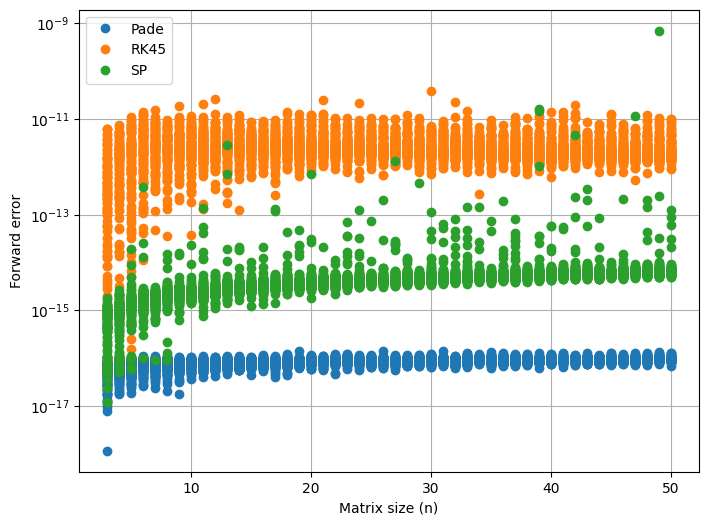

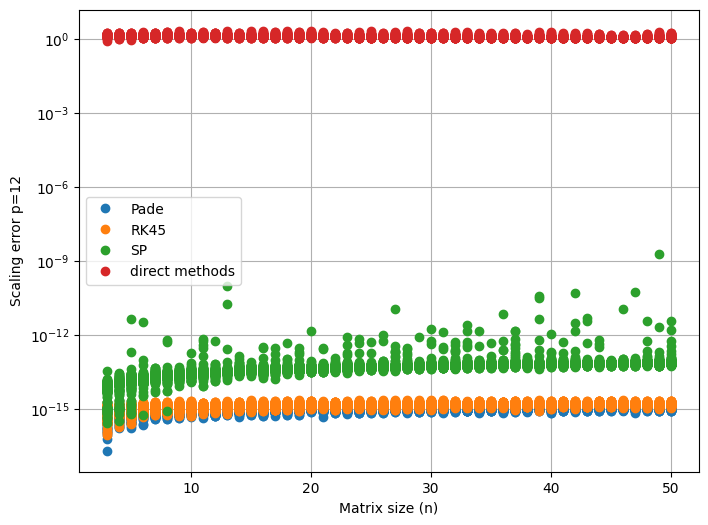

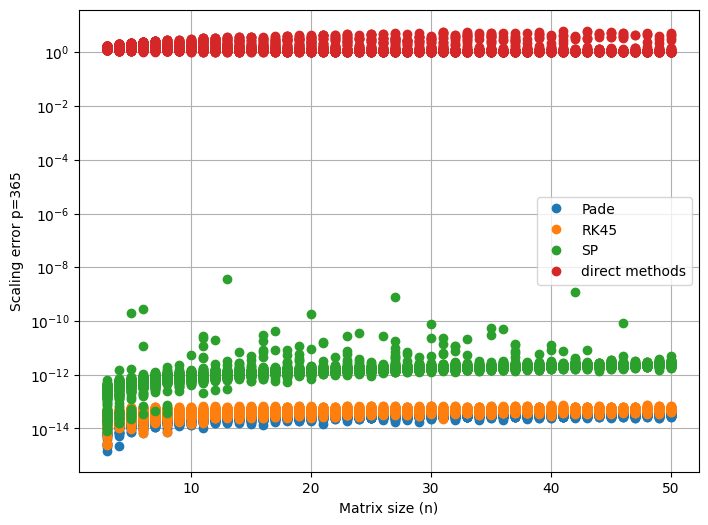

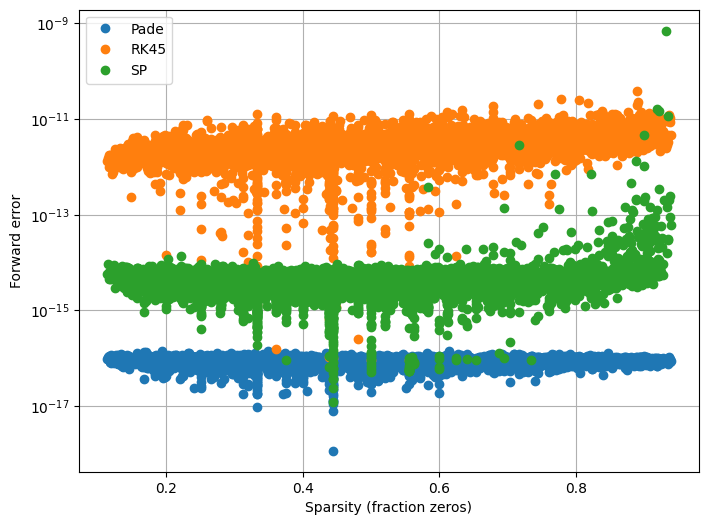

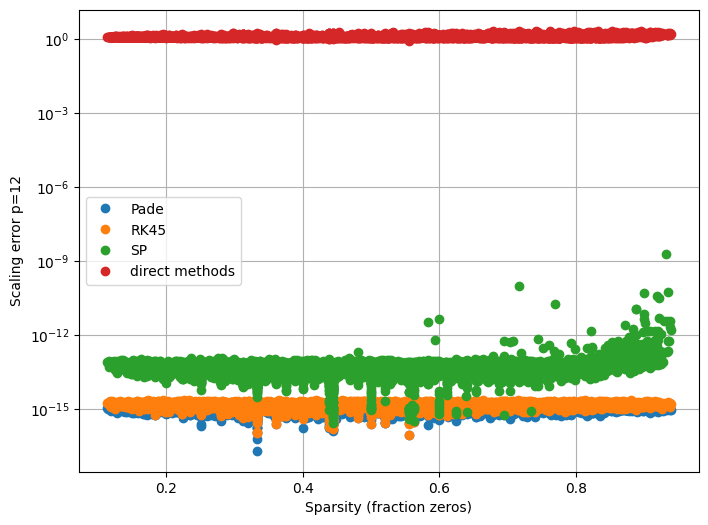

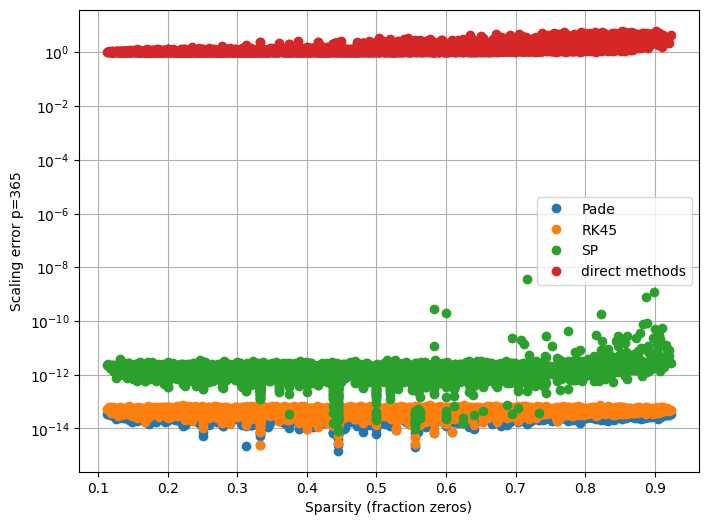

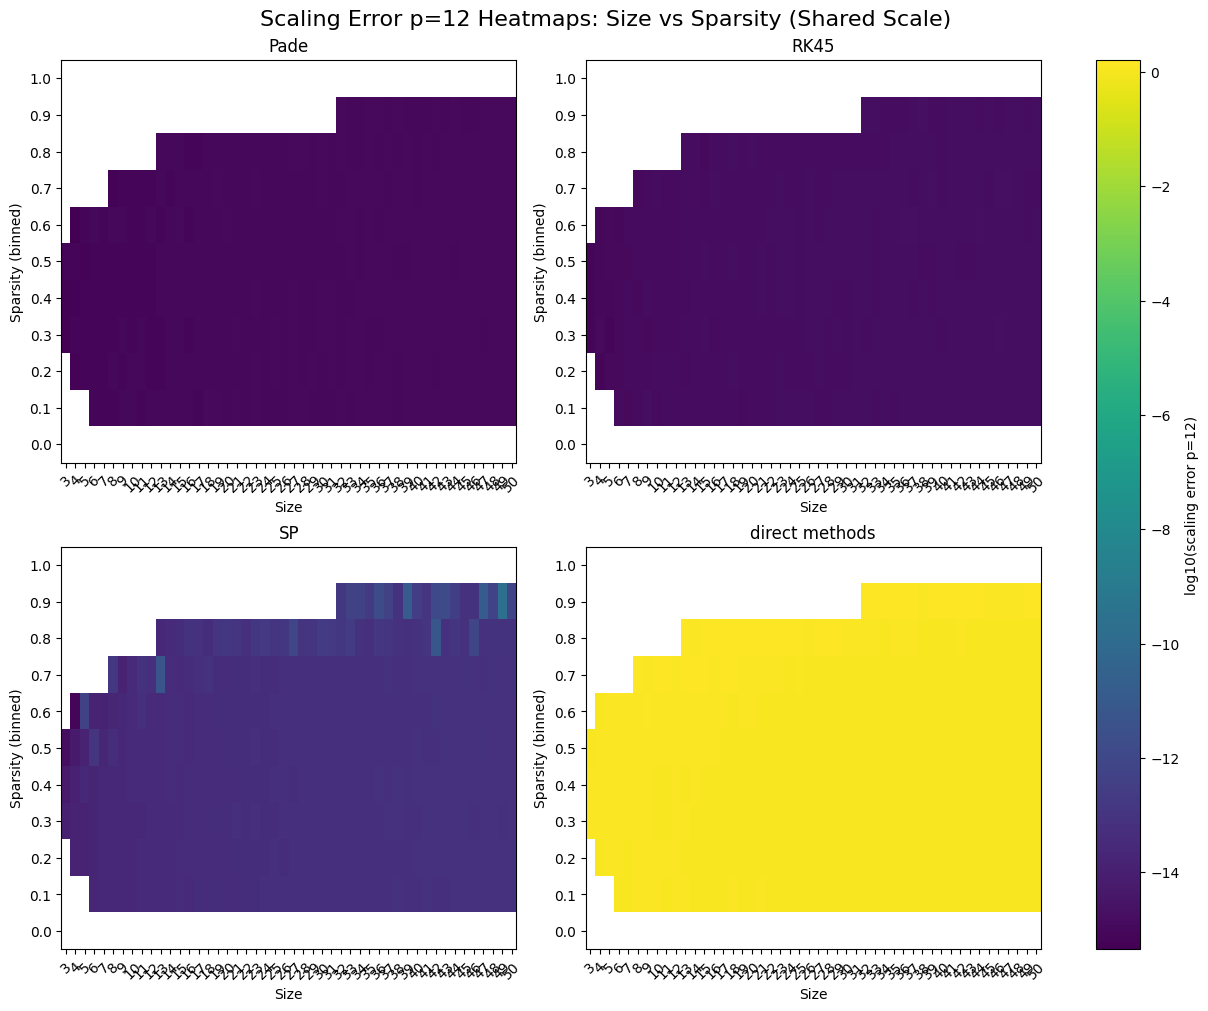

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


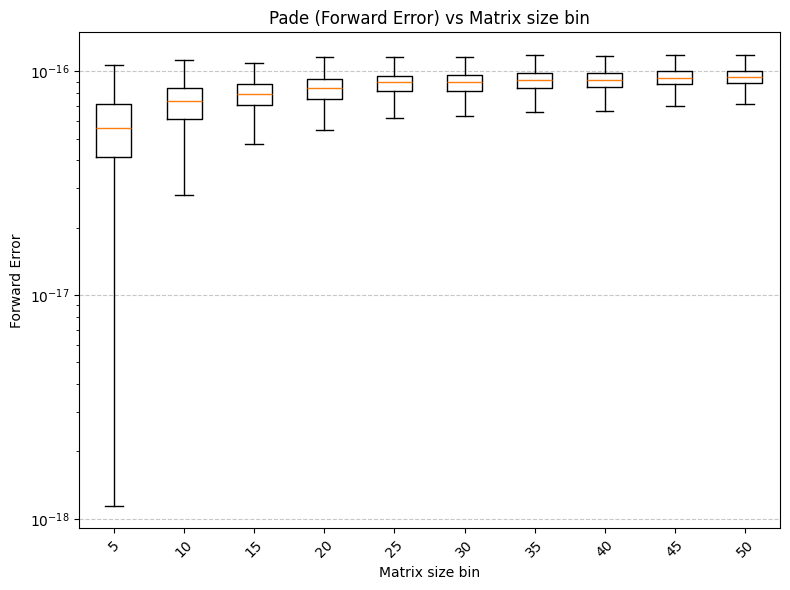

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


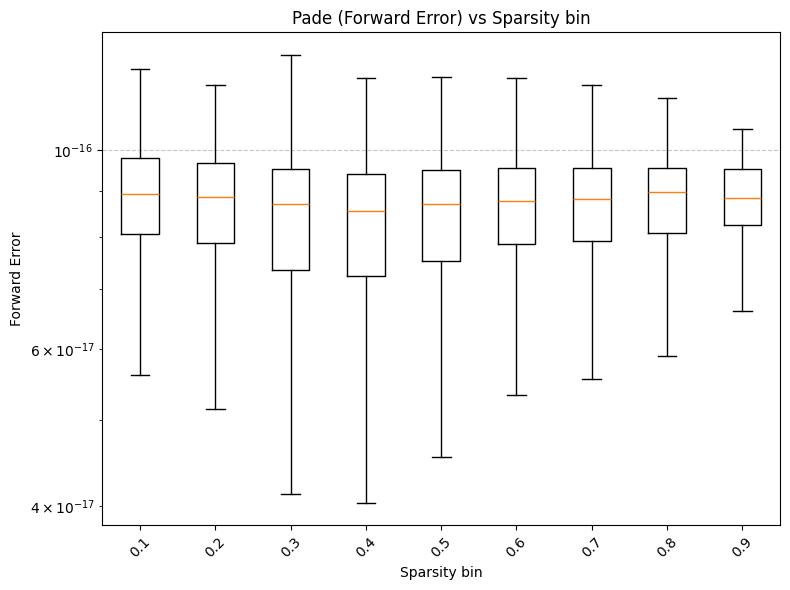

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


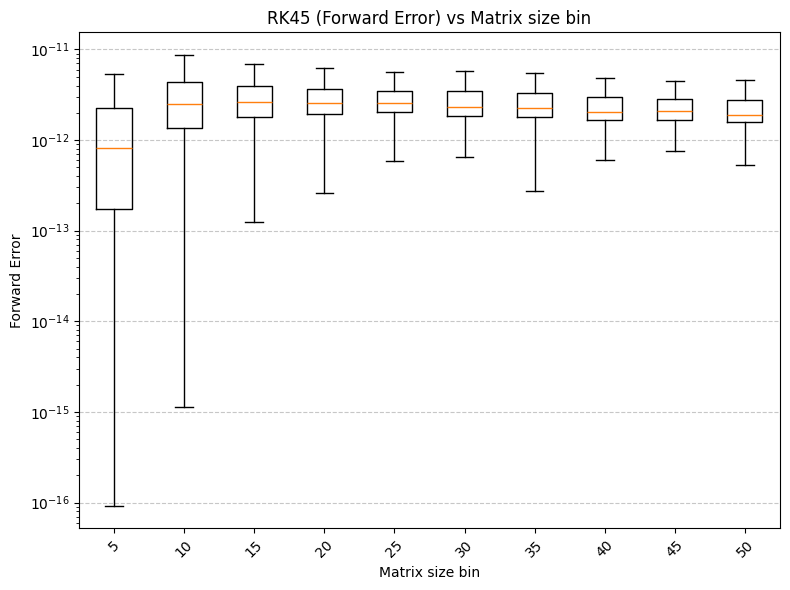

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


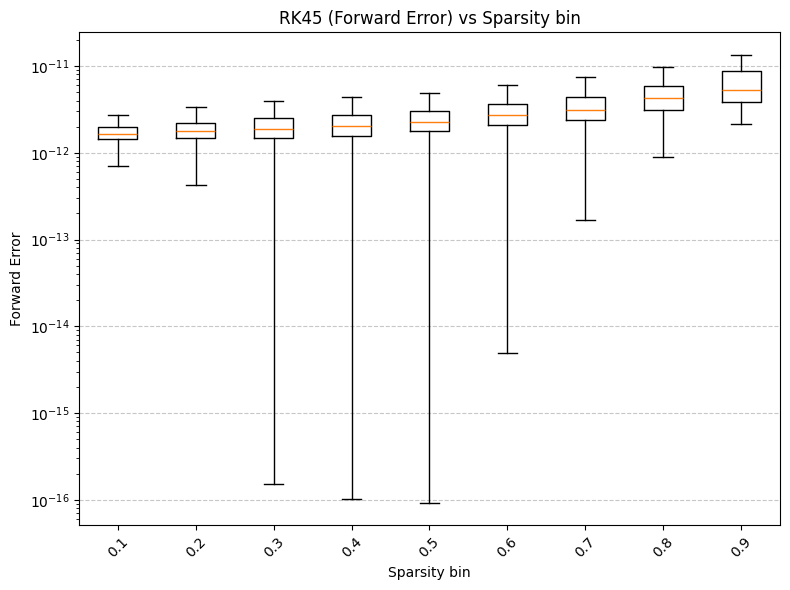

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


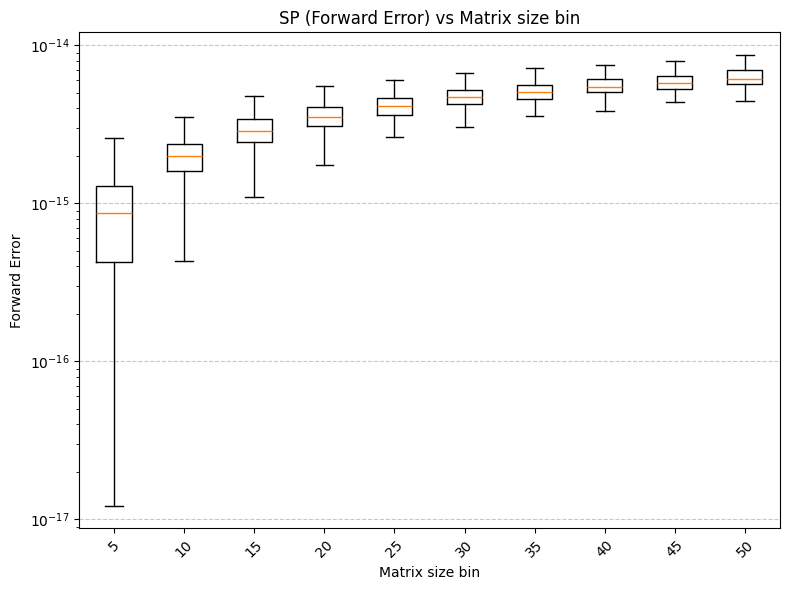

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


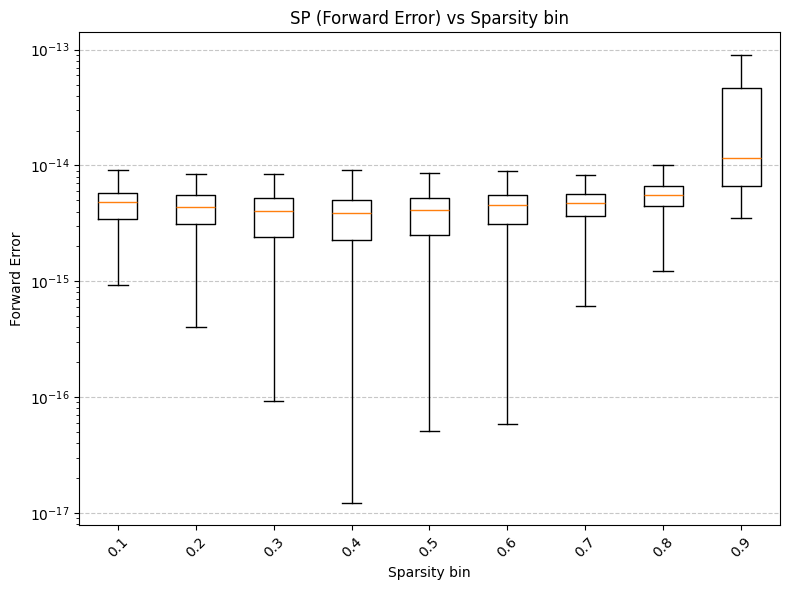

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


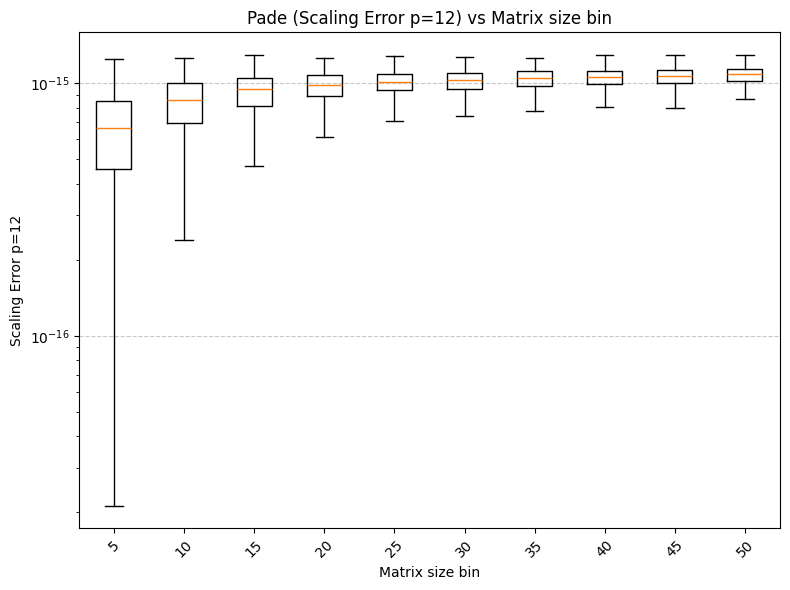

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


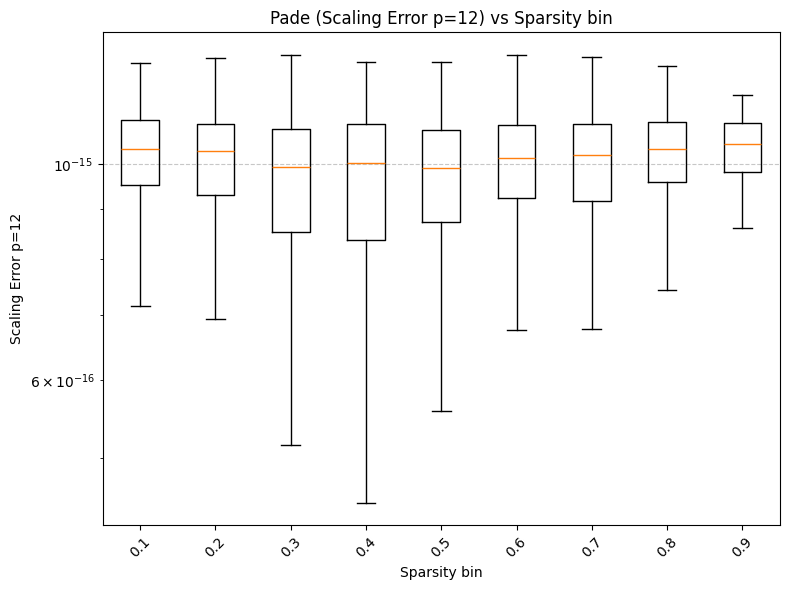

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


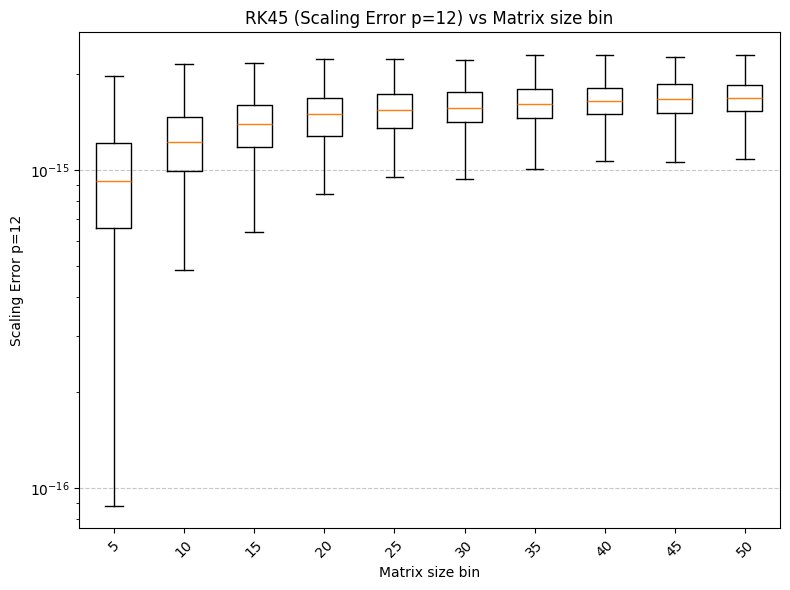

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


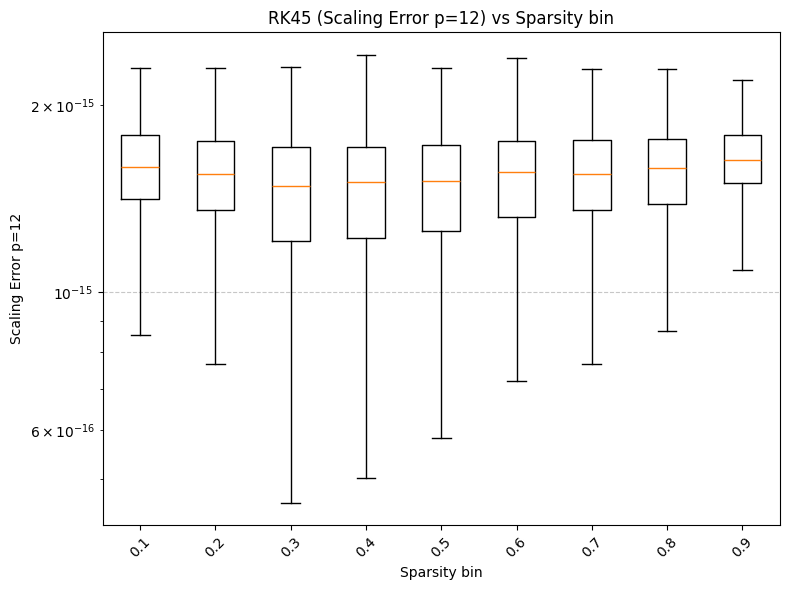

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


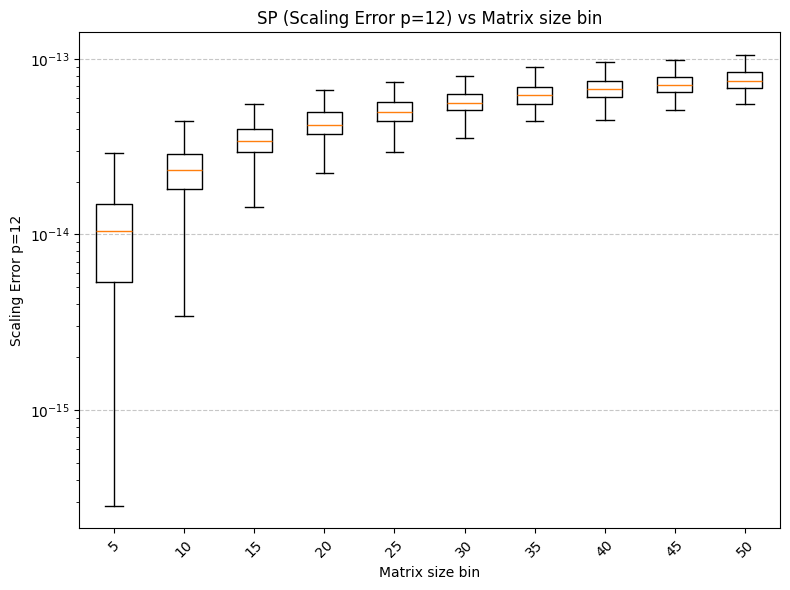

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


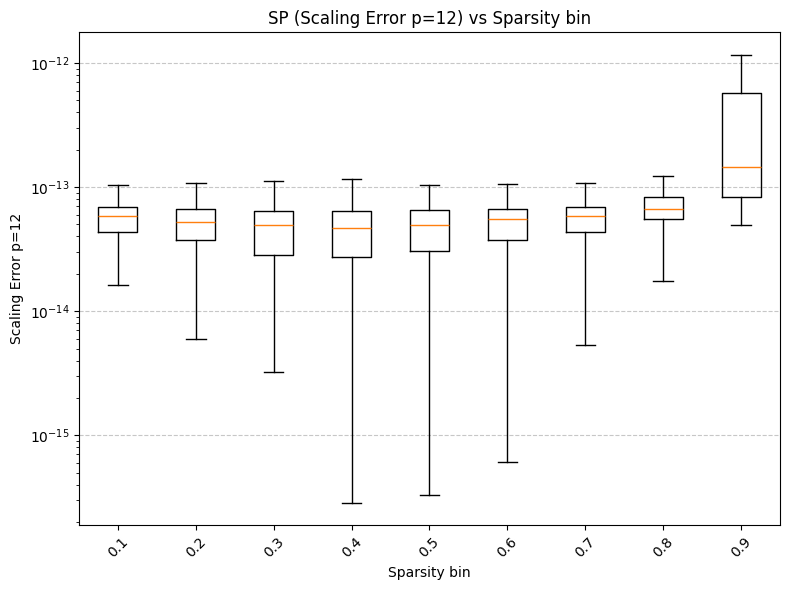

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


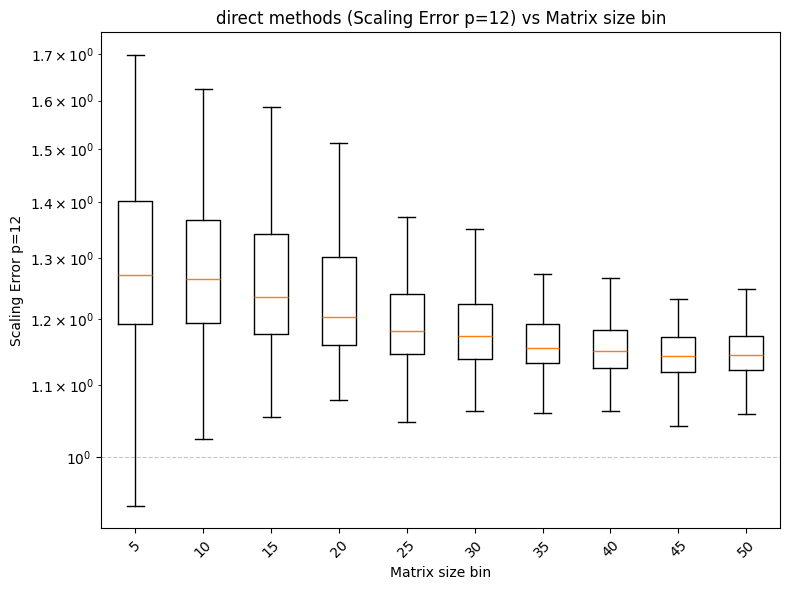

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


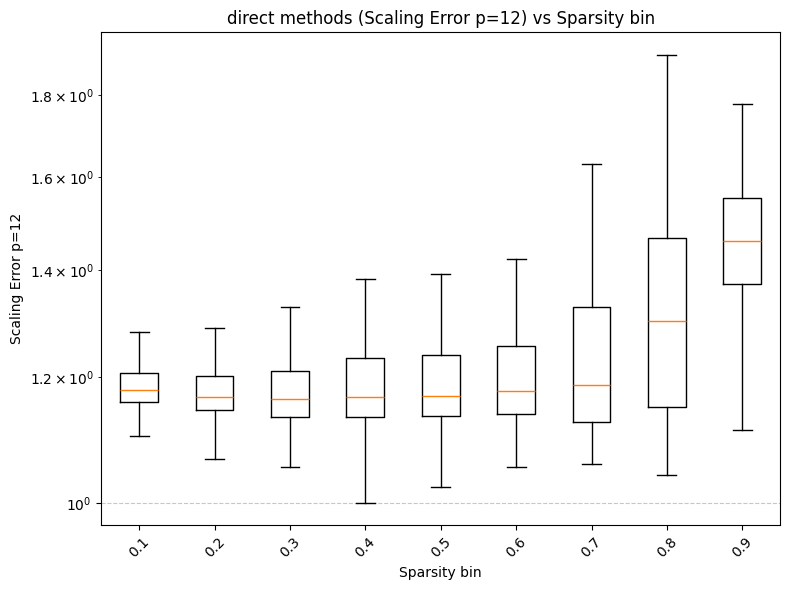

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


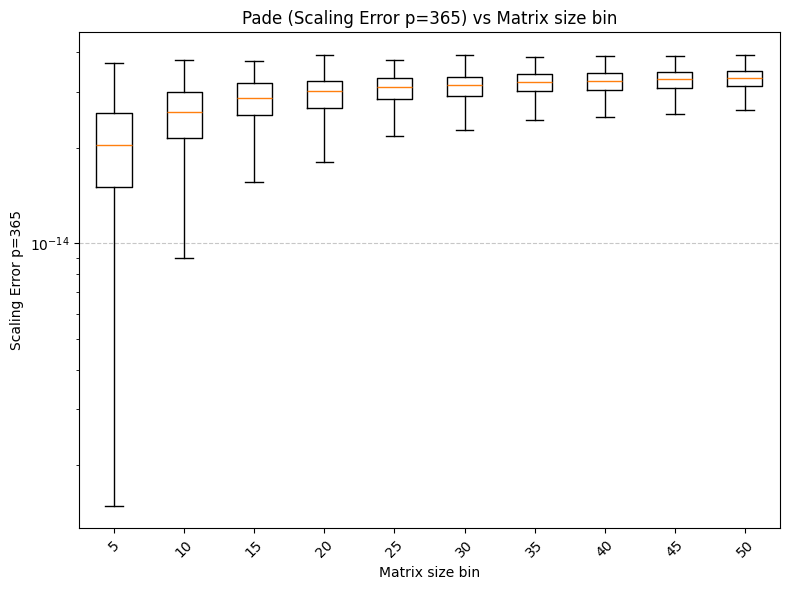

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


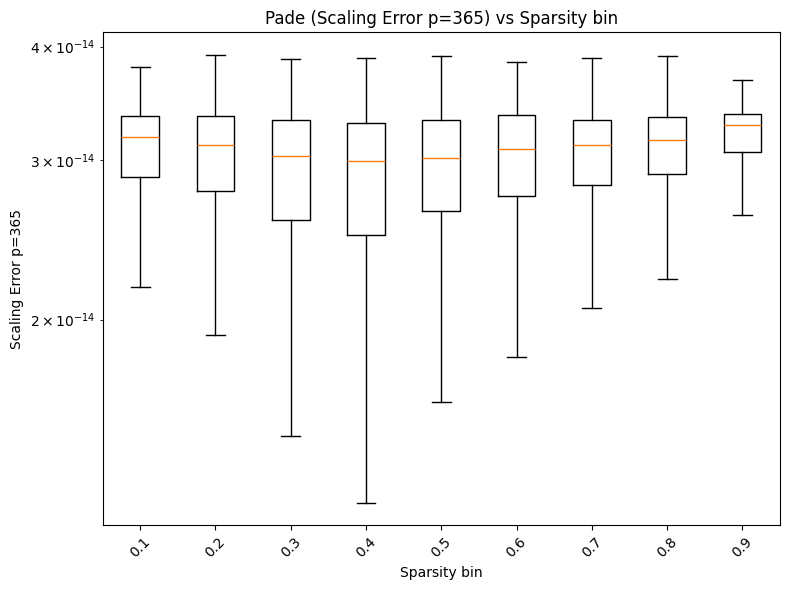

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


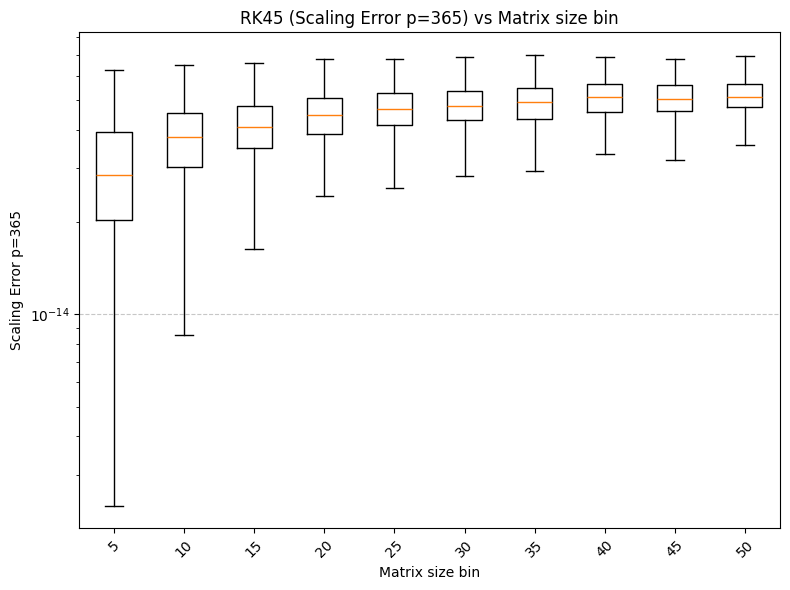

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


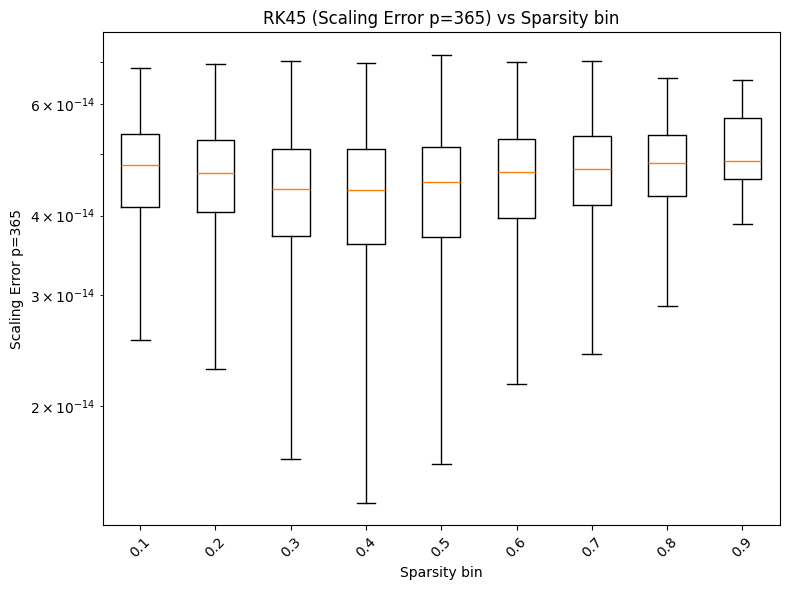

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


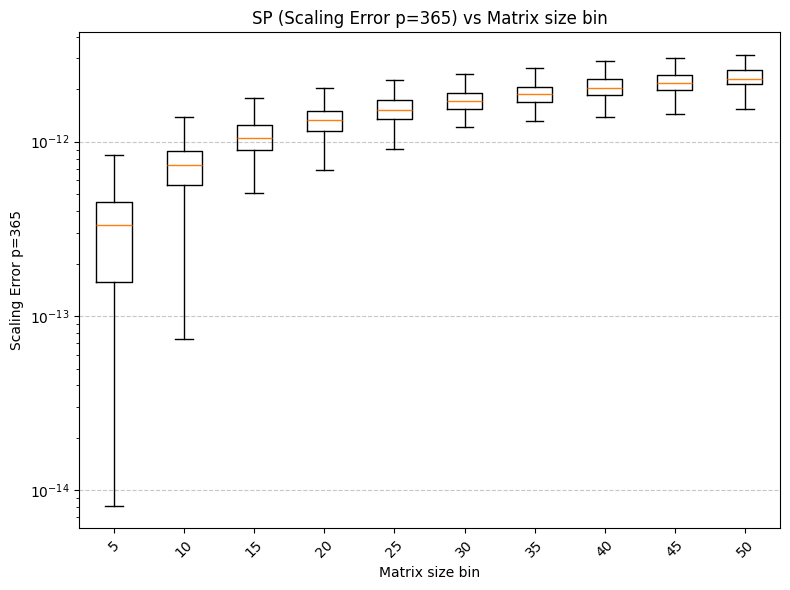

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


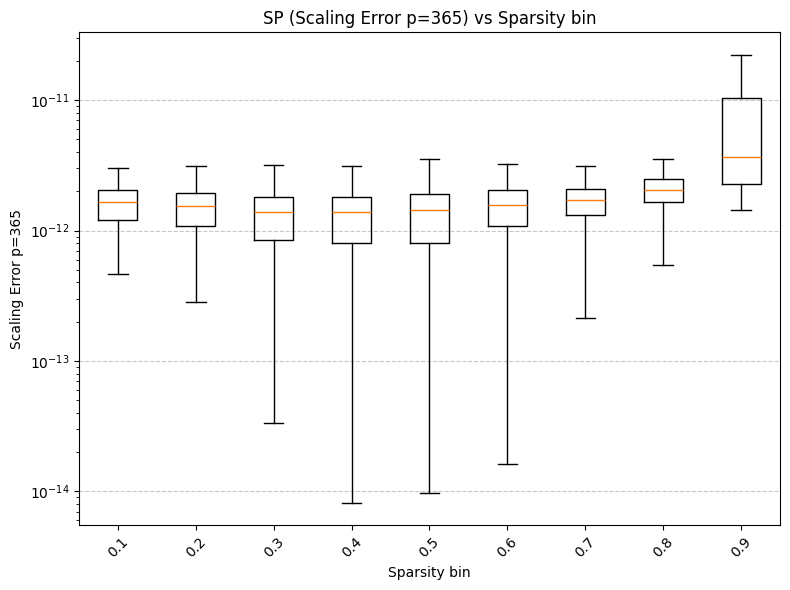

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


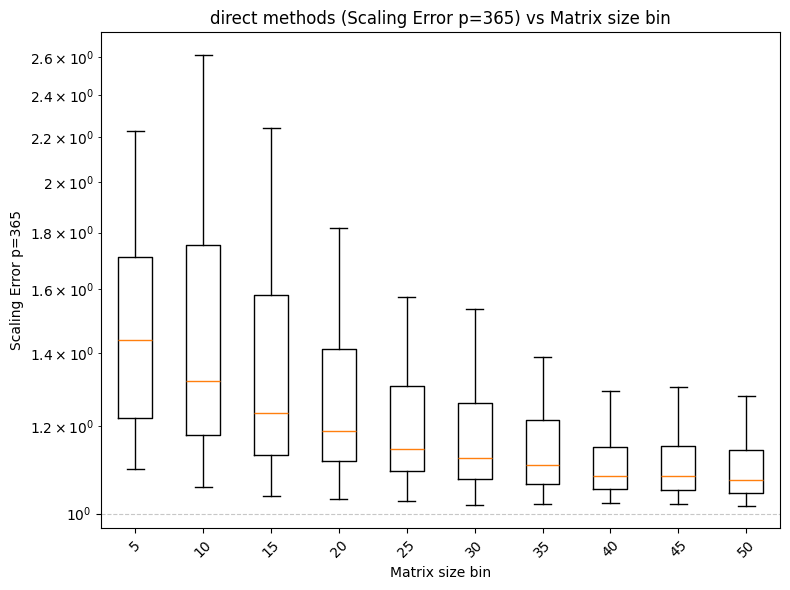

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\2446235494.py:181: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


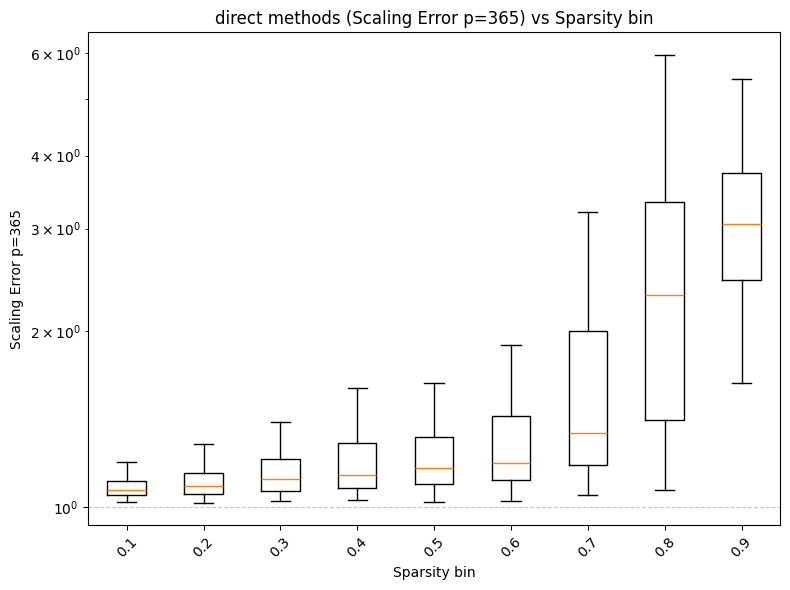

          Metric         Method    N         Mean       Median     CI Lower     CI Upper
   Forward Error           PADE 4849 8.516779e-17 8.784600e-17 8.451262e-17 8.582297e-17
   Forward Error           RK45 4849 2.826639e-12 2.256100e-12 2.741910e-12 2.911369e-12
   Forward Error             SP 4849 1.612719e-13 4.505000e-15 1.219400e-17 5.674228e-13
 Decomp Err p=12           PADE 4845 9.784499e-16 1.015070e-15 9.714060e-16 9.854939e-16
 Decomp Err p=12           RK45 4845 1.511052e-15 1.541310e-15 1.497206e-15 1.524898e-15
 Decomp Err p=12             SP 4845 5.291659e-13 5.501940e-14 2.848260e-16 1.639003e-12
 Decomp Err p=12 DIRECT METHODS 4845 1.222506e+00 1.175470e+00 1.216958e+00 1.228054e+00
Decomp Err p=365           PADE 4230 2.950815e-14 3.080145e-14 2.926902e-14 2.974729e-14
Decomp Err p=365           RK45 4230 4.531950e-14 4.615845e-14 4.486161e-14 4.577739e-14
Decomp Err p=365             SP 4230 3.247451e-12 1.569765e-12 5.835369e-13 5.911366e-12
Decomp Err p=365 DIRE

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\3706825050.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=labels, showfliers=False)


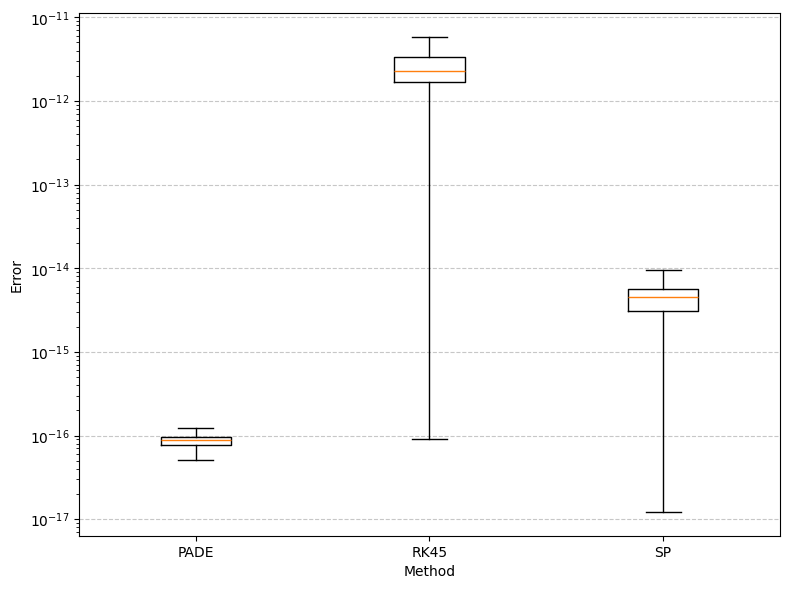

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\3706825050.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=labels, showfliers=False)


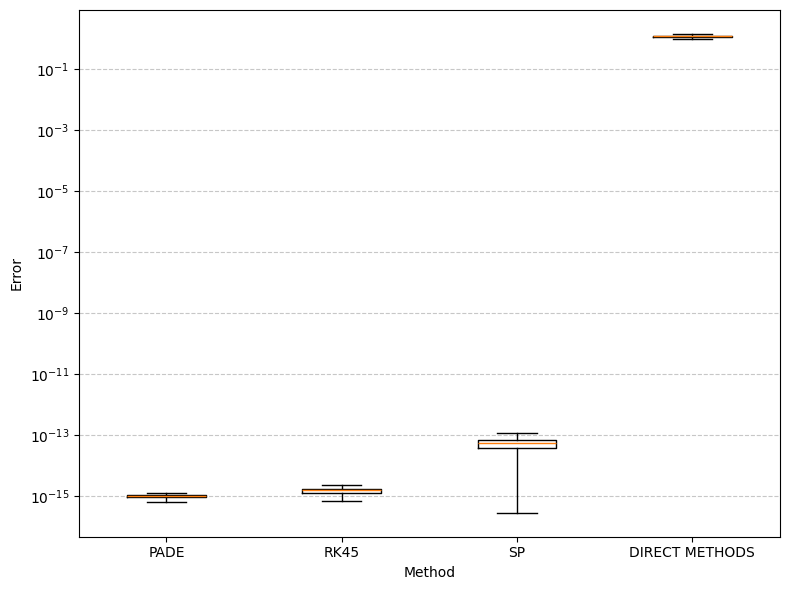

C:\Users\zacha\AppData\Local\Temp\ipykernel_11804\3706825050.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=labels, showfliers=False)


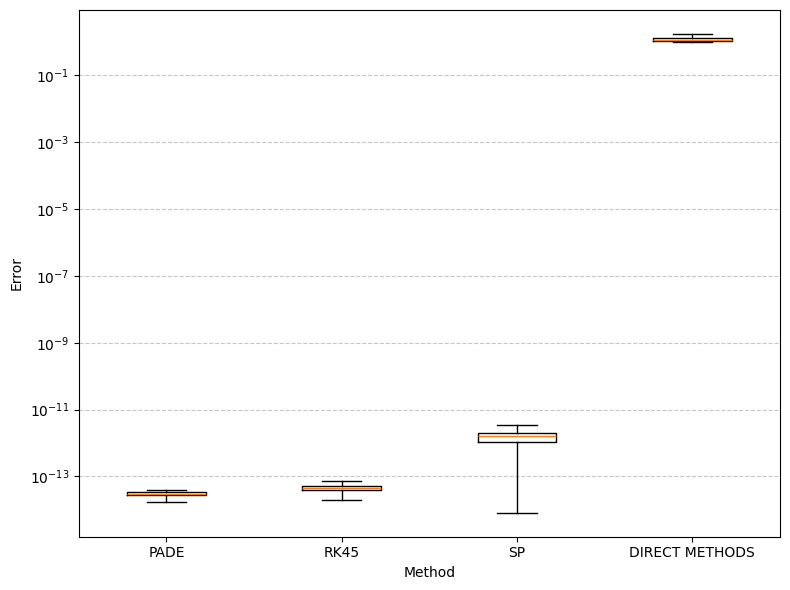

In [14]:
plot_size_vs_fwd_error(df)
plot_size_vs_decomp_error_12(df)
plot_size_vs_decomp_error_365(df)
plot_sparsity_vs_fwd_error(df)
plot_sparsity_vs_decomp_error_12(df)
plot_sparsity_vs_decomp_error_365(df)
plot_decomp12_heatmaps(df)

plot_error_boxplots_full(df)
print_and_plot_error_stats(df)
